In [1]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', \
              'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', \
              'rec.sport.baseball', 'rec.sport.hockey']
# categories = ['comp.graphics', 'comp.sys.mac.hardware']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, \
                                  random_state=42, remove=('headers'))
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, \
                                 random_state=42, remove=('headers'))
print 'Fetching data done!'

Fetching data done!


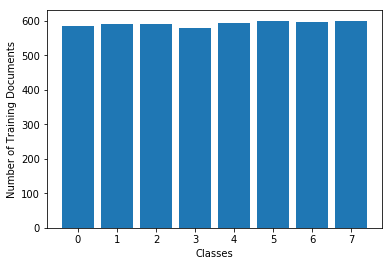

Part a) done


In [2]:
# a) plot a histogram
import numpy as np
import matplotlib.pyplot as plt

ctg_counts = np.zeros(8, dtype=np.int64)
for i in twenty_train.target:
    ctg_counts[i] += 1
classes = [0, 1, 2, 3, 4, 5, 6, 7]

plt.bar(classes, ctg_counts)
plt.xlabel('Classes')
plt.ylabel('Number of Training Documents')
plt.show()
print 'Part a) done'

In [31]:
# b)
import re
import string
import nltk 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem.snowball import SnowballStemmer
from nltk import pos_tag

# stop words
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
stop_words_en = stopwords.words('english')
from string import punctuation
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

# stemmer
stemmer = nltk.stem.SnowballStemmer('english')

# lemmatizer
import nltk
wnl = nltk.wordnet.WordNetLemmatizer()
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
def lemmatize_sent(list_word): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())
def stem_all(doc):
    return (word for word in lemmatize_sent((stemmer.stem(w) for w in analyzer(doc))) if word not in combined_stopwords and not word.isdigit())

min_dfs = [2, 5]
for min_df in min_dfs:
    count_vect = CountVectorizer(min_df=min_df,analyzer=stem_rmv_punc)
    X_train_counts = count_vect.fit_transform(twenty_train.data)
    print X_train_counts.shape

vectorizer = CountVectorizer(min_df=5, analyzer=stem_rmv_punc) # Note that min_df should also be change to 2
# vectorizer = CountVectorizer(analyzer='word', stop_words=stop_words, lowercase=True, min_df=5)
X_train_counts = vectorizer.fit_transform(twenty_train.data) # Sparse matrix doc * term --- counts
X_test_counts = vectorizer.fit_transform(twenty_test.data)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts) # docs(4732) * terms
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
print 'Part b) x done'

(4732, 23313)
(4732, 9591)
Part b) x done


In [6]:
# c)
twenty = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
vect = CountVectorizer(min_df=5,analyzer=stem_rmv_punc)

X = vect.fit_transform(twenty.data)
X_mat = X.toarray()
Class_counts = np.zeros((20, X.shape[1])) # classes(20) * terms
for i in range(X.shape[0]):
    class_num = twenty.target[i]
    Class_counts[class_num] += X_mat[i]
    
X_tficf = tfidf_transformer.fit_transform(Class_counts)
X_tficf_mat = X_tficf.toarray()
sorted_indices = np.argsort(X_tficf_mat)[:, -10:] # sort the matrix and get top 10 words for each class (20)

top10_words = [] # convert word indices to words
category_indices = [3, 4, 6, 15]
for i in range(4): # twenty.target_names[[3,4,6,15]]
    top10_words.append([])
    for index in sorted_indices[category_indices[i]]:
        top10_words[i].append(vect.get_feature_names()[index]) #!!!!!!!!!!!!!! vect-->
for i in range(4):
    print twenty.target_names[category_indices[i]],
    for word in top10_words[i]:
        print word, ' ',
    print '\n',
print 'part c) done' # Left -> Right : 10th -> 1st

comp.sys.ibm.pc.hardware card   organization   use   subject   ide   com   line   drive   edu   scsi   
comp.sys.mac.hardware post   problem   quadra   apple   use   organization   subject   mac   line   edu   
misc.forsale host   new   com   university   post   organization   sale   subject   line   edu   
soc.religion.christian christ   line   people   jesus   subject   church   say   christian   edu   god   
part c) done


In [7]:
# d) 
# LSI
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=42)
X_train_lsi = svd.fit_transform(X_train_tfidf)
X_test_lsi = svd.fit_transform(X_test_tfidf)

# NMF
from sklearn.decomposition import NMF
nmf = NMF(n_components=50, init='random', random_state=42)
X_train_nmf = nmf.fit_transform(X_train_tfidf)
X_test_nmf = nmf.fit_transform(X_test_tfidf)

print 'Part d) done'

Part d) done


Accuracy of LSI min_df = 2 is 0.971111111111
Precision of LSI min_df = 2 is 0.966397013068
Recall of LSI min_df = 2 is 0.976729559748


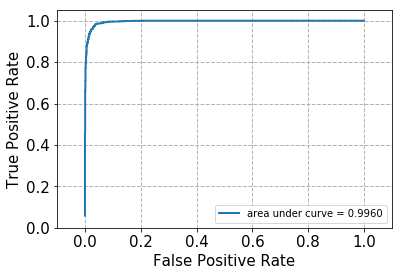

Confusion matrix, without normalization
[[1506   54]
 [  37 1553]]
Normalized confusion matrix
[[ 0.97  0.03]
 [ 0.02  0.98]]


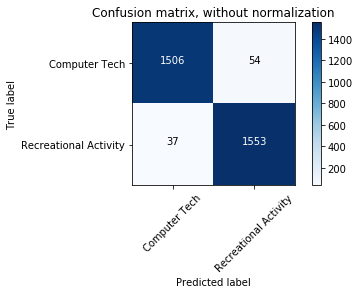

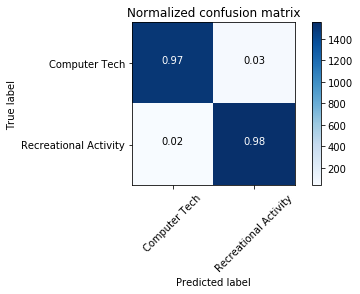

Accuracy of LSI min_df = 5 is 0.971428571429
Precision of LSI min_df = 5 is 0.96468401487
Recall of LSI min_df = 5 is 0.979245283019


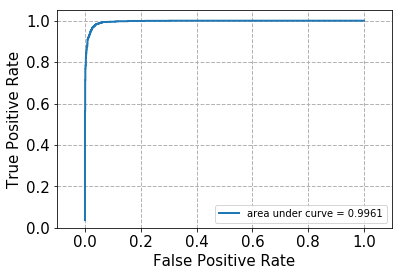

Confusion matrix, without normalization
[[1503   57]
 [  33 1557]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


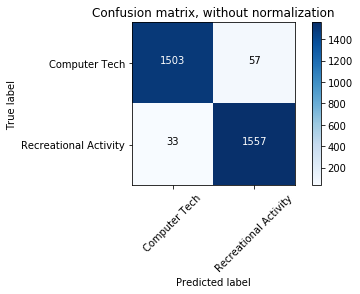

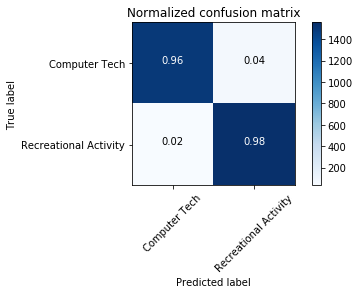

Accuracy of NMF min_df = 2 is 0.969841269841
Precision of NMF min_df = 2 is 0.962275819419
Recall of NMF min_df = 2 is 0.978616352201


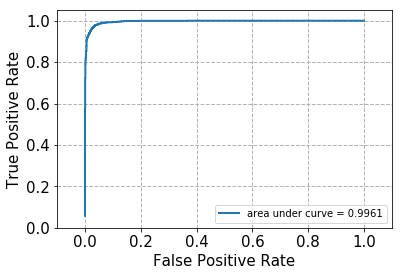

Confusion matrix, without normalization
[[1499   61]
 [  34 1556]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


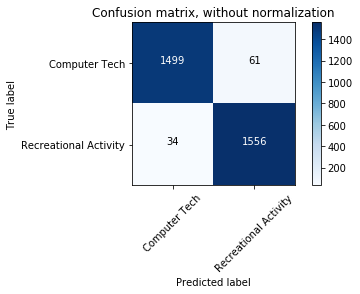

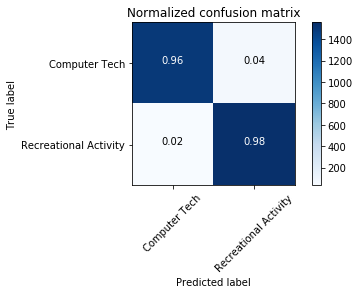

Accuracy of LSI min_df = 2 is 0.971428571429
Precision of LSI min_df = 2 is 0.96468401487
Recall of LSI min_df = 2 is 0.979245283019


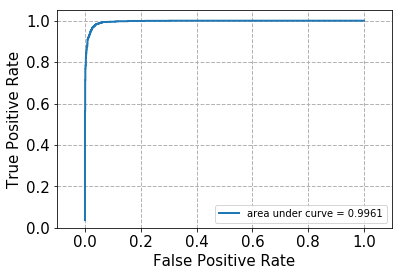

Confusion matrix, without normalization
[[1503   57]
 [  33 1557]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


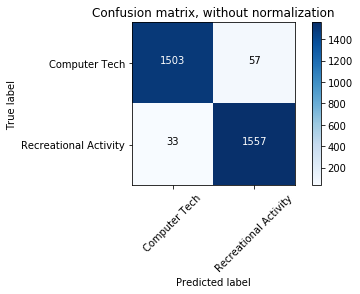

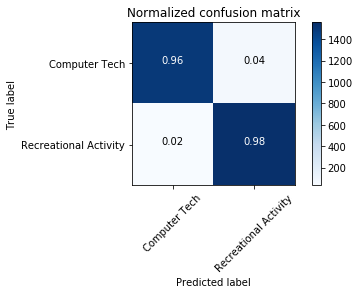

Accuracy of LSI min_df = 5 is 0.971428571429
Precision of LSI min_df = 5 is 0.96468401487
Recall of LSI min_df = 5 is 0.979245283019


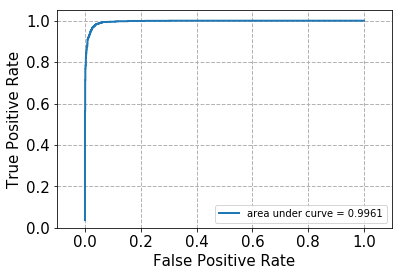

Confusion matrix, without normalization
[[1503   57]
 [  33 1557]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


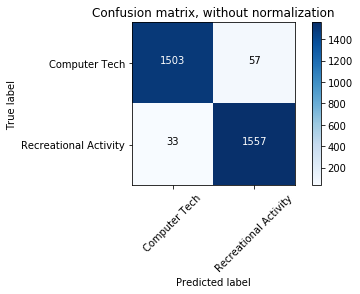

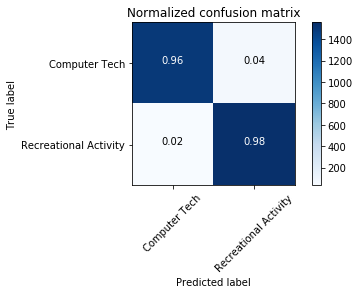

Accuracy of NMF min_df = 2 is 0.969841269841
Precision of NMF min_df = 2 is 0.962275819419
Recall of NMF min_df = 2 is 0.978616352201


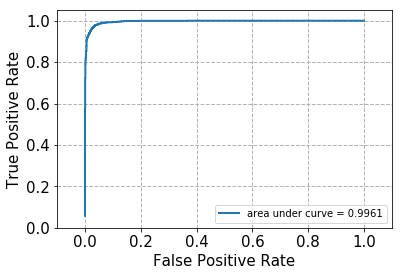

Confusion matrix, without normalization
[[1499   61]
 [  34 1556]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


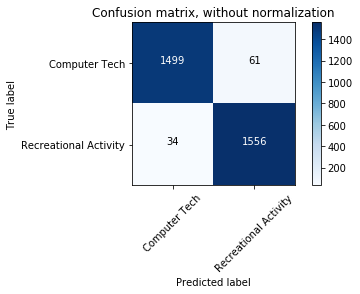

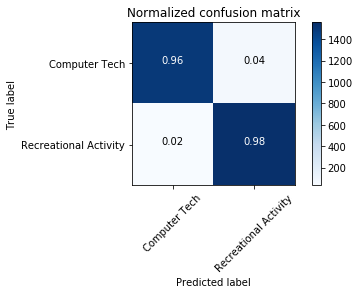

Part e) done


In [28]:
# e)
import itertools
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

train_targets = np.array(twenty_train.target >= 4, dtype=int)
test_targets = np.array(twenty_test.target >= 4, dtype=int)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    if normalize:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            # plt.text(j, i, cm[i, j],
            plt.text(j, i, "%.2f"%cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            # plt.text(j, i, "%.2f"%cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
    plt.show()

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label, s):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    prob_score = pipe.predict_proba(test_data)
    pre = pipe.predict(test_data)
    
    accuracy = accuracy_score(test_label, pre)
    precision = precision_score(test_label, pre)
    recall = recall_score(test_label, pre)
    
    print 'Accuracy of', s, 'is', accuracy
    print 'Precision of', s, 'is', precision
    print 'Recall of', s, 'is', recall
    
    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])
    plot_roc(fpr, tpr)
    
    # Compute confusion matrix
    class_names = ['Computer Tech', 'Recreational Activity']
    cnf_matrix = confusion_matrix(test_targets, pre)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()
    return pipe

# LSI gamma = 1000 min_df = 2
pp_svc_lsi_1000 = Pipeline([
    ('vect', CountVectorizer(min_df=2, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', svm.SVC(C=1000, random_state=42, kernel='linear', probability=True)),
])
fit_predict_and_plot_roc(pp_svc_lsi_1000, twenty_train.data, train_targets, twenty_test.data, test_targets, 'LSI min_df = 2')

# LSI gamma = 1000 min_df = 5
pp_svc_lsi_1000 = Pipeline([
    ('vect', CountVectorizer(min_df=5, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', svm.SVC(C=1000, random_state=42, kernel='linear', probability=True)),
])
fit_predict_and_plot_roc(pp_svc_lsi_1000, twenty_train.data, train_targets, twenty_test.data, test_targets, 'LSI min_df = 5')

# NMF gamma = 1000 min_df = 2
pp_svc_nmf_1000 = Pipeline([
    ('vect', CountVectorizer(min_df=2, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=42)),
    ('clf', svm.SVC(C=1000, random_state=42, kernel='linear', probability=True)),
])
fit_predict_and_plot_roc(pp_svc_nmf_1000, twenty_train.data, train_targets, twenty_test.data, test_targets, 'NMF min_df = 2')

# LSI gamma = 0.001 min_df = 2
pp_svc_lsi_0_001 = Pipeline([
    ('vect', CountVectorizer(min_df=2, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', svm.SVC(C=0.001, random_state=42, kernel='linear', probability=True)),
])
fit_predict_and_plot_roc(pp_svc_lsi_1000, twenty_train.data, train_targets, twenty_test.data, test_targets, 'LSI min_df = 2')

# LSI gamma = 0.001 min_df = 5
pp_svc_lsi_0_001 = Pipeline([
    ('vect', CountVectorizer(min_df=5, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', svm.SVC(C=0.001, random_state=42, kernel='linear', probability=True)),
])
fit_predict_and_plot_roc(pp_svc_lsi_1000, twenty_train.data, train_targets, twenty_test.data, test_targets, 'LSI min_df = 5')
    
# NMF gamma = 0.001 min_df = 2
pp_svc_nmf_0_001 = Pipeline([
    ('vect', CountVectorizer(min_df=2, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=42)),
    ('clf', svm.SVC(C=0.001, random_state=42, kernel='linear', probability=True)),
])
fit_predict_and_plot_roc(pp_svc_nmf_1000, twenty_train.data, train_targets, twenty_test.data, test_targets, 'NMF min_df = 2')

print 'Part e) done'

[0.93720051571245599, 0.9503942217989676, 0.956229854854452, 0.96130342240940647, 0.96523630667601257, 0.96536296881481631, 0.962316879747531]
Best gamma of LSI is 100
Accuracy of LSI min_df = 2 is 0.969206349206
Precision of LSI min_df = 2 is 0.958256599141
Recall of LSI min_df = 2 is 0.981761006289


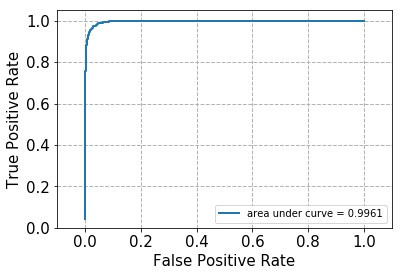

Confusion matrix, without normalization
[[1492   68]
 [  29 1561]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


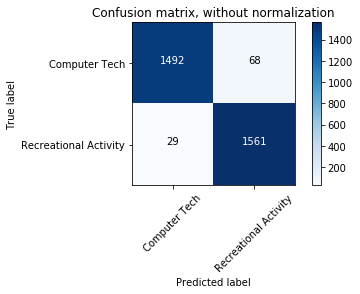

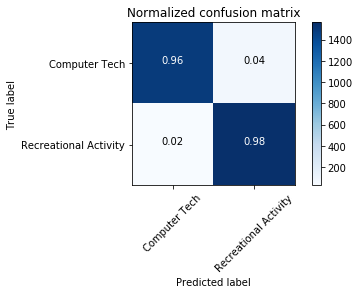

[0.93720051571245599, 0.9503942217989676, 0.956229854854452, 0.96130342240940647, 0.96523630667601257, 0.96536296881481631, 0.962316879747531]
Best gamma of LSI is 100
Accuracy of LSI min_df = 5 is 0.969206349206
Precision of LSI min_df = 5 is 0.958819913952
Recall of LSI min_df = 5 is 0.981132075472


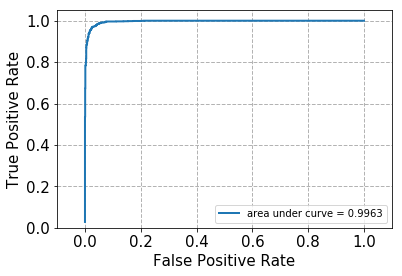

Confusion matrix, without normalization
[[1493   67]
 [  30 1560]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


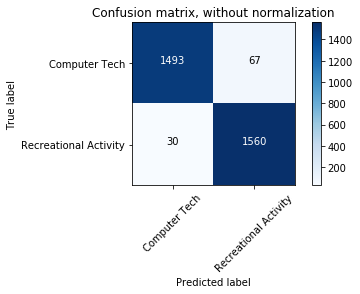

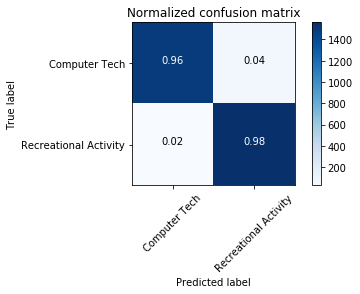

[0.5279116241054187, 0.6229095991870488, 0.70332742851359131, 0.7422842543028112, 0.77959527710475496, 0.79305051944480076, 0.71949345552125687]
Best gamma of NMF is 100
Accuracy of NMF min_df = 2 is 0.954920634921
Precision of NMF min_df = 2 is 0.935096153846
Recall of NMF min_df = 2 is 0.978616352201


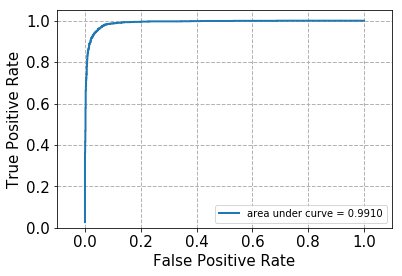

Confusion matrix, without normalization
[[1452  108]
 [  34 1556]]
Normalized confusion matrix
[[ 0.93  0.07]
 [ 0.02  0.98]]


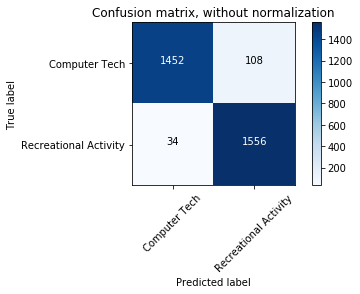

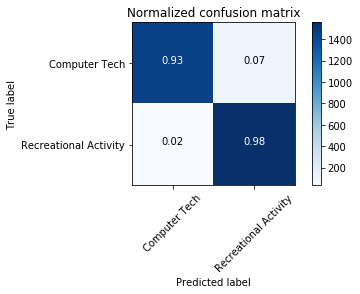

Part f) done


In [29]:
# f)
from sklearn.model_selection import cross_val_score

def find_best_gamma_fun(X_train, X_test):
    accuracies = []
    gammas = [10 ** i for i in range(-3,4)]
    for gamma in gammas:
        clf = svm.LinearSVC(C=gamma, random_state=42)
        scores = cross_val_score(clf, np.concatenate((X_train, X_test), axis=0), \
                                 y=np.append(train_targets, test_targets), cv=5, scoring='accuracy')
        accuracies.append(np.average(scores))
    print accuracies
    best_gamma = gammas[accuracies.index(max(accuracies))]
    return best_gamma

vect5 = CountVectorizer(min_df=5, analyzer=stem_rmv_punc) # Note that min_df should also be change to 2
vect2 = CountVectorizer(min_df=2, analyzer=stem_rmv_punc) 
tfidf_transformer = TfidfTransformer()

X_train_tfidf5 = tfidf_transformer.fit_transform(vect5.fit_transform(twenty_train.data))
X_test_tfidf5 = tfidf_transformer.fit_transform(vect5.fit_transform(twenty_test.data))
X_train_tfidf2 = tfidf_transformer.fit_transform(vect2.fit_transform(twenty_train.data))
X_test_tfidf2 = tfidf_transformer.fit_transform(vect2.fit_transform(twenty_test.data))

X_train_lsi2 = svd.fit_transform(X_train_tfidf2)
X_test_lsi2 = svd.fit_transform(X_test_tfidf2)
X_train_lsi5 = svd.fit_transform(X_train_tfidf5)
X_test_lsi5 = svd.fit_transform(X_test_tfidf5)
X_train_nmf2 = nmf.fit_transform(X_train_tfidf2)
X_test_nmf2 = nmf.fit_transform(X_test_tfidf2)

# LSI min_df = 2
best_lsi_gamma = find_best_gamma_fun(X_train_lsi2, X_test_lsi2)
print 'Best gamma of LSI is', best_lsi_gamma
pp_svc_lsi = Pipeline([
    ('vect', CountVectorizer(min_df=2, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', svm.SVC(best_lsi_gamma, random_state=42, probability=True)),
])
fit_predict_and_plot_roc(pp_svc_lsi, twenty_train.data, train_targets, twenty_test.data, test_targets, 'LSI min_df = 2')

# LSI min_df = 5
best_lsi_gamma = find_best_gamma_fun(X_train_lsi5, X_test_lsi5)
print 'Best gamma of LSI is', best_lsi_gamma
pp_svc_lsi = Pipeline([
    ('vect', CountVectorizer(min_df=5, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', svm.SVC(best_lsi_gamma, random_state=42, probability=True)),
])
fit_predict_and_plot_roc(pp_svc_lsi, twenty_train.data, train_targets, twenty_test.data, test_targets, 'LSI min_df = 5')

# NMF min_df = 2
best_nmf_gamma = find_best_gamma_fun(X_train_nmf2, X_test_nmf2)
print 'Best gamma of NMF is', best_nmf_gamma
pp_svc_nmf = Pipeline([
    ('vect', CountVectorizer(min_df=2, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=42)),
    ('clf', svm.SVC(best_nmf_gamma, random_state=42, probability=True)),
])
fit_predict_and_plot_roc(pp_svc_nmf, twenty_train.data, train_targets, twenty_test.data, test_targets, 'NMF min_df = 2')

print 'Part f) done'

Accuracy of NMF min_df = 2 is 0.944126984127
Precision of NMF min_df = 2 is 0.90632183908
Recall of NMF min_df = 2 is 0.991823899371


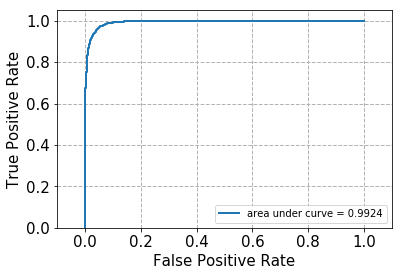

Confusion matrix, without normalization
[[1397  163]
 [  13 1577]]
Normalized confusion matrix
[[ 0.9   0.1 ]
 [ 0.01  0.99]]


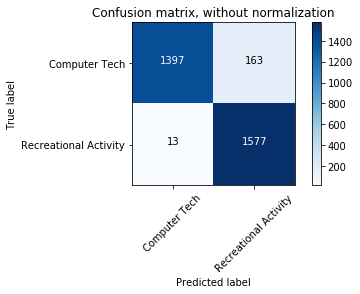

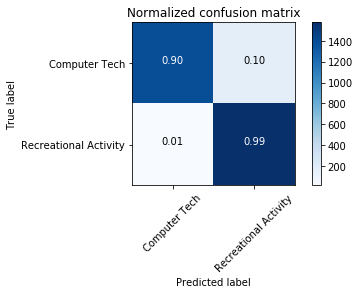

Part g) done


In [30]:
# g)
from sklearn.naive_bayes import MultinomialNB
    
# LSI N/A

# NMF
pp_nb_nmf = Pipeline([
    ('vect', CountVectorizer(min_df=2, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=42)),
    ('clf', MultinomialNB()),
])
fit_predict_and_plot_roc(pp_nb_nmf, twenty_train.data, train_targets, twenty_test.data, test_targets, 'NMF min_df = 2')

print 'Part g) done'

Accuracy of LSI is 0.972698412698
Precision of LSI is 0.963054187192
Recall of LSI is 0.983647798742


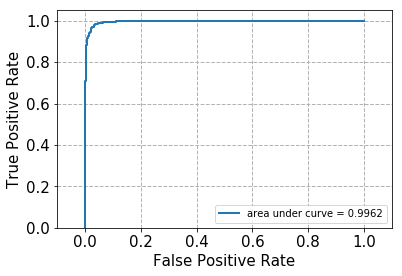

Confusion matrix, without normalization
[[1500   60]
 [  26 1564]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


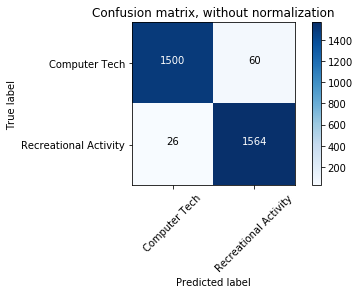

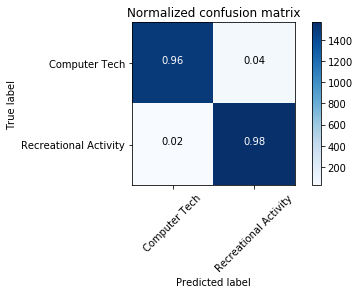

Accuracy of LSI is 0.970476190476
Precision of LSI is 0.962894248609
Recall of LSI is 0.979245283019


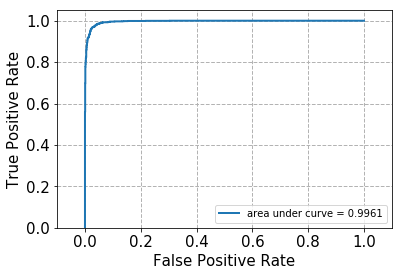

Confusion matrix, without normalization
[[1500   60]
 [  33 1557]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


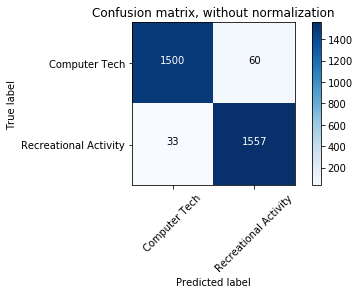

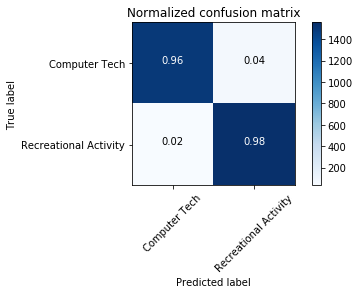

Accuracy of NMF is 0.967301587302
Precision of NMF is 0.954740061162
Recall of NMF is 0.981761006289


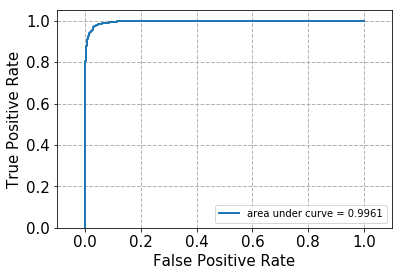

Confusion matrix, without normalization
[[1486   74]
 [  29 1561]]
Normalized confusion matrix
[[ 0.95  0.05]
 [ 0.02  0.98]]


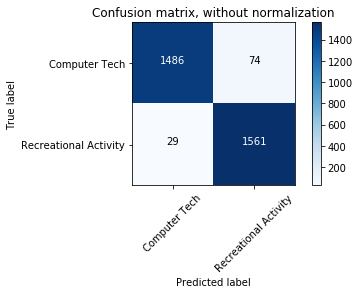

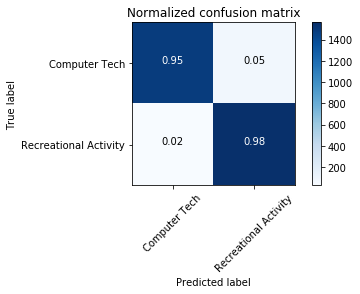

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
     ...ty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [54]:
# h) penalty default l2 C => 0
from sklearn.linear_model import LogisticRegression

# LSI min_df = 2
pp_log_lsi2 = Pipeline([
    ('vect', CountVectorizer(min_df=2, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', LogisticRegression(C=10000000)),
])
fit_predict_and_plot_roc(pp_log_lsi2, twenty_train.data, train_targets, twenty_test.data, test_targets, 'LSI')

# LSI min_df = 5
pp_log_lsi5 = Pipeline([
    ('vect', CountVectorizer(min_df=5, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', LogisticRegression(C=10000000)),
])
fit_predict_and_plot_roc(pp_log_lsi5, twenty_train.data, train_targets, twenty_test.data, test_targets, 'LSI')

# NMF min_df = 2
pp_log_nmf = Pipeline([
    ('vect', CountVectorizer(min_df=2, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=42)),
    ('clf', LogisticRegression(C=10000000)),
])
fit_predict_and_plot_roc(pp_log_nmf, twenty_train.data, train_targets, twenty_test.data, test_targets, 'NMF')

[0.89777777777777779, 0.90126984126984122, 0.91555555555555557, 0.94158730158730164, 0.93301587301587297, 0.8990476190476191, 0.49523809523809526]
Best gamma 1
Coefficients
[[ -2.62  71.67  25.42 -25.46   0.    -7.28  10.95   0.    12.07   0.
   -6.76  11.45  -2.74   3.89   0.    -4.    -1.27   4.87  -0.64   0.
   -2.97   2.93   0.     0.     4.41   0.     0.     0.     3.53   0.     0.
    0.     0.    -1.32  -2.88   0.     0.     0.     0.     0.     0.     0.
   -0.28   0.     0.     0.     0.     0.     0.     0.  ]]
Accuracy of LSI l1 is 0.967619047619
Precision of LSI l1 is 0.95869297164
Recall of LSI l1 is 0.977987421384


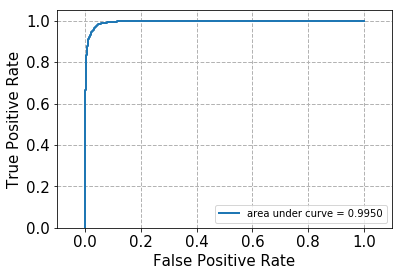

Confusion matrix, without normalization
[[1493   67]
 [  35 1555]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


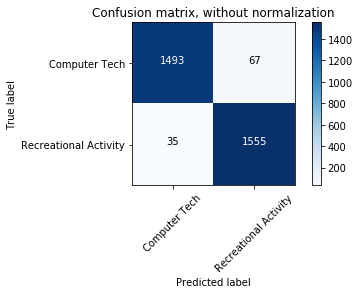

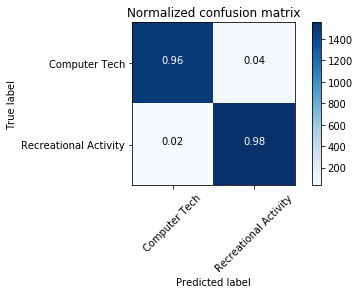

[0.92920634920634926, 0.93047619047619046, 0.93809523809523809, 0.95079365079365075, 0.93492063492063493, 0.90476190476190477, 0.49523809523809526]
Best gamma 1
Coefficients
[[ -3.14  69.25  23.67 -22.21  -0.17 -12.48   2.96   0.     9.3    9.41
   -4.02  10.98   3.12   0.     0.     1.6    0.     1.44  -0.31  -4.22
    4.47   0.     0.    -1.17   2.44   5.81   1.73   0.     0.     0.     0.
    0.     0.    -6.06   0.     0.     0.     0.     0.     0.     0.     0.
    0.1   -1.19   0.41   0.     0.     0.     0.     0.  ]]
Accuracy of LSI l1 is 0.967619047619
Precision of LSI l1 is 0.95869297164
Recall of LSI l1 is 0.977987421384


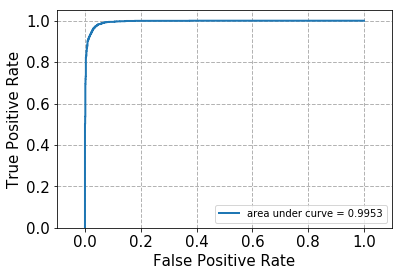

Confusion matrix, without normalization
[[1493   67]
 [  35 1555]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


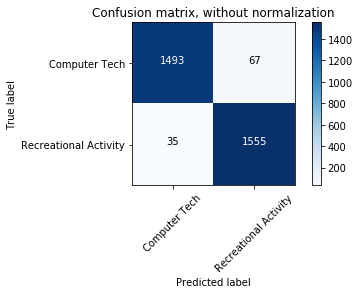

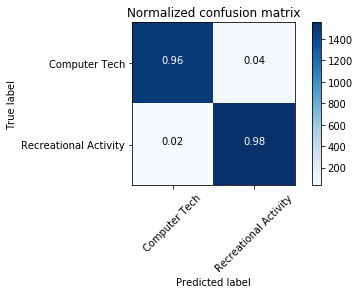

[0.38857142857142857, 0.39206349206349206, 0.37428571428571428, 0.35301587301587301, 0.50095238095238093, 0.49523809523809526, 0.49523809523809526]
Best gamma 10
Coefficients
[[ 7.6  -5.09  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]
Accuracy of NMF l1 is 0.745396825397
Precision of NMF l1 is 0.780626780627
Recall of NMF l1 is 0.689308176101


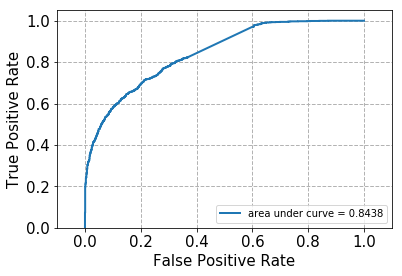

Confusion matrix, without normalization
[[1252  308]
 [ 494 1096]]
Normalized confusion matrix
[[ 0.8   0.2 ]
 [ 0.31  0.69]]


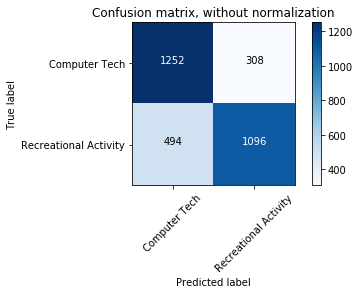

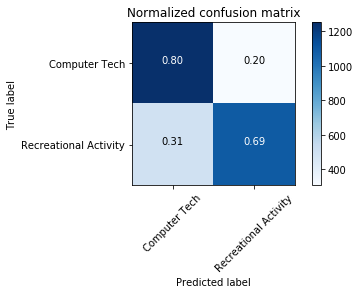

[0.90317460317460319, 0.9098412698412699, 0.92095238095238097, 0.92253968253968255, 0.92825396825396822, 0.90666666666666662, 0.71809523809523812]
Best gamma 10
Coefficients
[[ -5.01e-01   8.35e+00   2.85e+00  -2.47e+00  -7.23e-02  -4.00e-01
    1.65e+00  -3.21e-02   7.34e-01   1.81e-01  -6.28e-01   2.49e-01
   -3.71e-01  -1.02e-01   5.66e-01   1.50e-02  -2.77e-01   5.32e-01
   -3.12e-01   5.42e-02  -5.44e-01   5.30e-01  -1.50e-02   1.25e-01
    3.73e-01   1.53e-01   3.91e-01  -6.51e-02   2.72e-01  -6.76e-02
   -8.74e-02  -2.86e-01  -4.03e-02  -2.83e-01  -3.23e-01  -1.66e-01
   -3.46e-02  -1.61e-01  -2.17e-02   2.95e-01   1.11e-01   9.94e-02
   -3.46e-01   9.69e-02  -1.84e-01  -1.56e-01   2.96e-03  -5.62e-02
   -8.34e-02   1.43e-01]]
Accuracy of LSI l2 is 0.954920634921
Precision of LSI l2 is 0.933532934132
Recall of LSI l2 is 0.980503144654


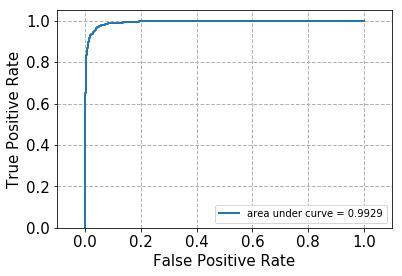

Confusion matrix, without normalization
[[1449  111]
 [  31 1559]]
Normalized confusion matrix
[[ 0.93  0.07]
 [ 0.02  0.98]]


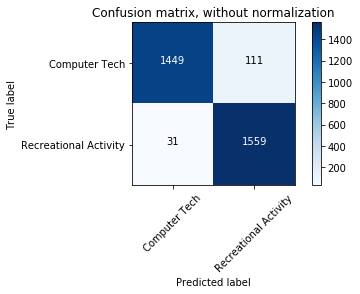

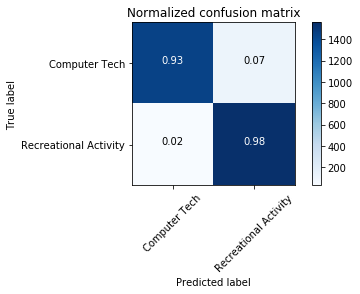

[0.92920634920634926, 0.93047619047619046, 0.93809523809523809, 0.95079365079365075, 0.9352380952380952, 0.90476190476190477, 0.49523809523809526]
Best gamma 1
Coefficients
[[ -1.84e+00   2.42e+01   9.50e+00  -7.11e+00  -6.22e-01  -3.55e+00
    4.89e+00   2.15e+00   2.81e+00   2.77e+00  -1.97e+00   1.71e+00
    1.18e+00  -1.58e+00  -1.83e+00  -1.26e-01  -3.91e-01   2.45e+00
   -6.05e-01  -2.30e+00   2.27e+00  -5.85e-01   3.36e-01  -1.54e+00
    1.27e+00   1.96e+00   1.78e+00   4.61e-01   2.47e-01   1.05e+00
   -6.28e-02   1.05e+00  -6.22e-01  -1.89e+00  -2.63e-01  -1.48e-01
    2.48e-02   3.23e-01   1.21e+00  -1.15e+00  -2.95e-03   9.29e-01
    1.56e+00  -1.04e+00   1.82e+00  -5.81e-01  -7.32e-01   1.03e+00
    5.42e-01  -3.00e-01]]
Accuracy of LSI l2 is 0.967619047619
Precision of LSI l2 is 0.959259259259
Recall of LSI l2 is 0.977358490566


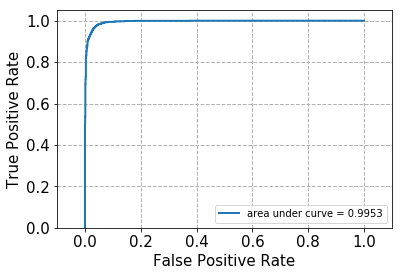

Confusion matrix, without normalization
[[1494   66]
 [  36 1554]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.02  0.98]]


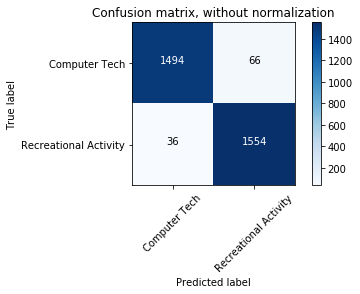

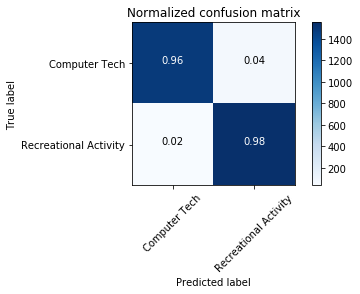

[0.38825396825396824, 0.37777777777777777, 0.37111111111111111, 0.38317460317460317, 0.43523809523809526, 0.52285714285714291, 0.50476190476190474]
Best gamma 100
Coefficients
[[ 0.14 -0.17 -0.03 -0.09  0.05  0.08 -0.07  0.04 -0.06  0.06 -0.05  0.05
  -0.04 -0.02 -0.06 -0.04  0.02  0.02  0.04 -0.04  0.04  0.   -0.07  0.02
  -0.03 -0.03  0.02  0.04  0.07 -0.06  0.    0.03  0.02 -0.09  0.02 -0.02
  -0.03 -0.03 -0.08  0.04  0.05  0.03 -0.06  0.04  0.03  0.03  0.03 -0.04
  -0.03 -0.04]]
Accuracy of NMF l2 is 0.529206349206
Precision of NMF l2 is 0.517409697364
Recall of NMF l2 is 1.0


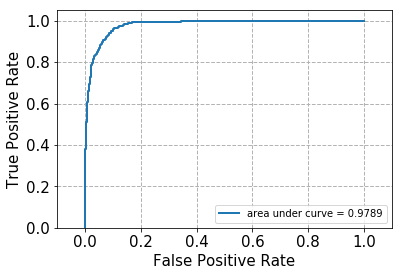

Confusion matrix, without normalization
[[  77 1483]
 [   0 1590]]
Normalized confusion matrix
[[ 0.05  0.95]
 [ 0.    1.  ]]


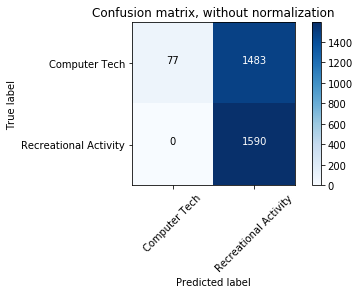

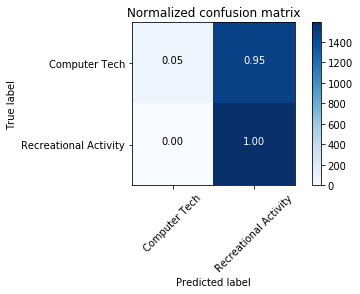

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
     ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [52]:
# i)
def fine_best_gamma_log_fun(X_train, X_test, norm):
    accuracies = []
    gammas = [10 ** i for i in range(-3,4)]
    for gamma in gammas: 
        clf = LogisticRegression(penalty=norm, C=float(1)/gamma).fit(X_train, train_targets) # (X_train_lsi2, train_targets)
        pred = clf.predict(X_test) #(X_test_lsi2)
        accuracy = accuracy_score(test_targets, pred)
        accuracies.append(accuracy)
    print accuracies
    best_gamma = gammas[accuracies.index(max(accuracies))]
    print 'Best gamma', best_gamma
    return best_gamma

# LSI l1 min_df = 2
best_gamma_lsi2_l1 = fine_best_gamma_log_fun(X_train_lsi2, X_test_lsi2, 'l1')
clf = LogisticRegression(penalty='l1', C=float(1)/best_gamma_lsi2_l1).fit(X_train_lsi2, train_targets)
print 'Coefficients'
print clf.coef_
pp_log_lsi2_l1 = Pipeline([
    ('vect', CountVectorizer(min_df=2, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', LogisticRegression(penalty='l1', C=float(1)/best_gamma_lsi2_l1)),
])
fit_predict_and_plot_roc(pp_log_lsi2_l1, twenty_train.data, train_targets, twenty_test.data, test_targets, 'LSI l1')

# LSI l1 min_df = 5
best_gamma_lsi5_l1 = fine_best_gamma_log_fun(X_train_lsi5, X_test_lsi5, 'l1')
clf = LogisticRegression(penalty='l1', C=float(1)/best_gamma_lsi5_l1).fit(X_train_lsi5, train_targets)
print 'Coefficients'
print clf.coef_
pp_log_lsi5_l1 = Pipeline([
    ('vect', CountVectorizer(min_df=5, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', LogisticRegression(penalty='l1', C=float(1)/best_gamma_lsi5_l1)),
])
fit_predict_and_plot_roc(pp_log_lsi5_l1, twenty_train.data, train_targets, twenty_test.data, test_targets, 'LSI l1')

# NMF l1 min_df = 2
best_gamma_nmf2_l1 = fine_best_gamma_log_fun(X_train_nmf2, X_test_nmf2, 'l1')
clf = LogisticRegression(penalty='l1', C=float(1)/best_gamma_nmf2_l1).fit(X_train_nmf2, train_targets)
print 'Coefficients'
print clf.coef_
pp_log_nmf2_l1 = Pipeline([
    ('vect', CountVectorizer(min_df=2, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=42)),
    ('clf', LogisticRegression(penalty='l1', C=float(1)/best_gamma_nmf2_l1)),
])
fit_predict_and_plot_roc(pp_log_nmf2_l1, twenty_train.data, train_targets, twenty_test.data, test_targets, 'NMF l1')


# LSI l2 min_df = 2
best_gamma_lsi2_l2 = fine_best_gamma_log_fun(X_train_lsi2, X_test_lsi2, 'l2')
clf = LogisticRegression(penalty='l2', C=float(1)/best_gamma_lsi2_l2).fit(X_train_lsi2, train_targets)
print 'Coefficients'
print clf.coef_
pp_log_lsi2_l2 = Pipeline([
    ('vect', CountVectorizer(min_df=2, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', LogisticRegression(penalty='l2', C=float(1)/best_gamma_lsi2_l2)),
])
fit_predict_and_plot_roc(pp_log_lsi2_l2, twenty_train.data, train_targets, twenty_test.data, test_targets, 'LSI l2')

# LSI l2 min_df = 5
best_gamma_lsi5_l2 = fine_best_gamma_log_fun(X_train_lsi5, X_test_lsi5, 'l1')
clf = LogisticRegression(penalty='l2', C=float(1)/best_gamma_lsi5_l2).fit(X_train_lsi5, train_targets)
print 'Coefficients'
print clf.coef_
pp_log_lsi5_l2 = Pipeline([
    ('vect', CountVectorizer(min_df=5, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', LogisticRegression(penalty='l2', C=float(1)/best_gamma_lsi5_l2)),
])
fit_predict_and_plot_roc(pp_log_lsi5_l1, twenty_train.data, train_targets, twenty_test.data, test_targets, 'LSI l2')

# NMF l2 min_df = 2
best_gamma_nmf2_l2 = fine_best_gamma_log_fun(X_train_nmf2, X_test_nmf2, 'l2')
clf = LogisticRegression(penalty='l2', C=float(1)/best_gamma_nmf2_l2).fit(X_train_nmf2, train_targets)
print 'Coefficients'
print clf.coef_
pp_log_nmf2_l2 = Pipeline([
    ('vect', CountVectorizer(min_df=2, stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', NMF(n_components=50, init='random', random_state=42)),
    ('clf', LogisticRegression(penalty='l2', C=float(1)/best_gamma_nmf2_l2)),
])
fit_predict_and_plot_roc(pp_log_nmf2_l2, twenty_train.data, train_targets, twenty_test.data, test_targets, 'NMF l2')


Accuracy of NB NMF is 0.798083067093
Recall of NB NMF is 0.798083067093
Precision of NB NMF is 0.812493176984
Confusion matrix, without normalization
[[327  20  36   9]
 [106 233  21  25]
 [ 56   9 300  25]
 [  5   0   4 389]]
Normalized confusion matrix
[[ 0.83  0.05  0.09  0.02]
 [ 0.28  0.61  0.05  0.06]
 [ 0.14  0.02  0.77  0.06]
 [ 0.01  0.    0.01  0.98]]


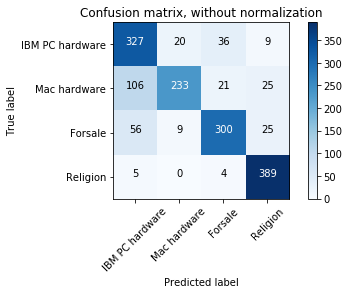

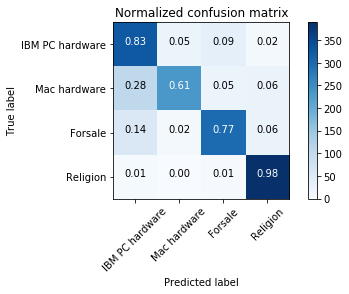

Accuracy of SVM One vs One LSI is 0.876038338658
Recall of SVM One vs One LSI is 0.876038338658
Precision of SVM One vs One LSI is 0.877825434676
Confusion matrix, without normalization
[[332  40  20   0]
 [ 51 317  16   1]
 [ 30  20 336   4]
 [  5   1   6 386]]
Normalized confusion matrix
[[ 0.85  0.1   0.05  0.  ]
 [ 0.13  0.82  0.04  0.  ]
 [ 0.08  0.05  0.86  0.01]
 [ 0.01  0.    0.02  0.97]]


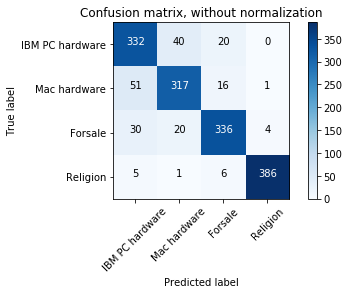

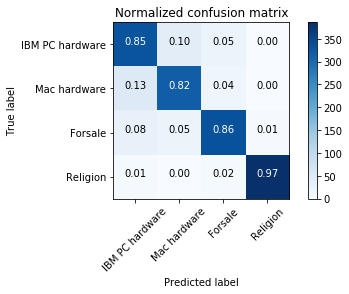

Accuracy of SVM One vs Rest LSI is 0.879872204473
Recall of SVM One vs Rest LSI is 0.879872204473
Precision of SVM One vs Rest LSI is 0.880826635121
Confusion matrix, without normalization
[[326  44  22   0]
 [ 46 322  15   2]
 [ 25  20 342   3]
 [  5   1   5 387]]
Normalized confusion matrix
[[ 0.83  0.11  0.06  0.  ]
 [ 0.12  0.84  0.04  0.01]
 [ 0.06  0.05  0.88  0.01]
 [ 0.01  0.    0.01  0.97]]


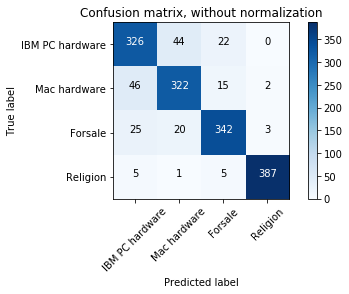

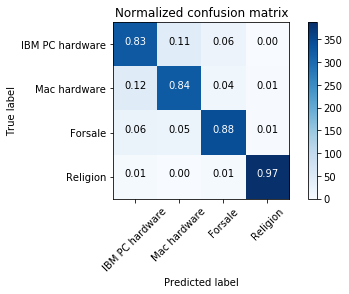

Accuracy of SVM One vs One NMF is 0.849840255591
Recall of SVM One vs One NMF is 0.849840255591
Precision of SVM One vs One NMF is 0.852728967755
Confusion matrix, without normalization
[[318  45  27   2]
 [ 69 298  15   3]
 [ 35  18 332   5]
 [  8   1   7 382]]
Normalized confusion matrix
[[ 0.81  0.11  0.07  0.01]
 [ 0.18  0.77  0.04  0.01]
 [ 0.09  0.05  0.85  0.01]
 [ 0.02  0.    0.02  0.96]]


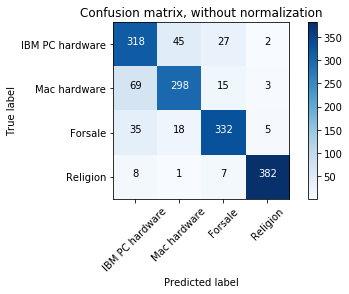

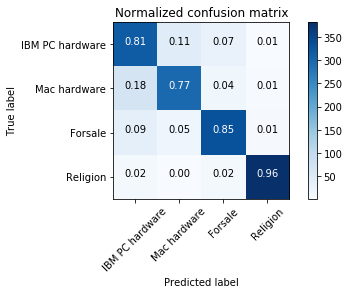

Accuracy of SVM One vs Rest NMF is 0.853674121406
Recall of SVM One vs Rest NMF is 0.853674121406
Precision of SVM One vs Rest NMF is 0.8539750664
Confusion matrix, without normalization
[[311  50  29   2]
 [ 57 305  18   5]
 [ 30  18 335   7]
 [  6   0   7 385]]
Normalized confusion matrix
[[ 0.79  0.13  0.07  0.01]
 [ 0.15  0.79  0.05  0.01]
 [ 0.08  0.05  0.86  0.02]
 [ 0.02  0.    0.02  0.97]]


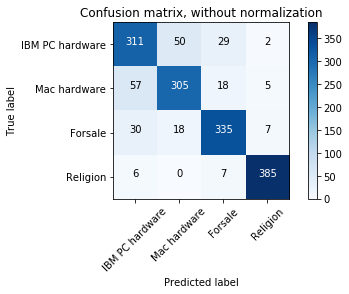

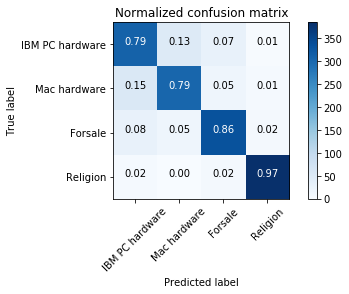

In [59]:
# j)
# Naive Baysien
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']

train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, \
                                  random_state=42, remove=('headers'))
test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, \
                                 random_state=42, remove=('headers'))

def multi_fun(clf, s, dimReduc):
    pp = Pipeline([
        ('vect', CountVectorizer(min_df=2, stop_words='english')),
        ('tfidf', TfidfTransformer()),
        ('reduce_dim', dimReduc),
        ('clf', clf),
    ])
    pp.fit(train.data, train.target)
    pred = pp.predict(test.data)
    
    accuracy = accuracy_score(test.target, pred)
    recall = recall_score(test.target, pred, average='weighted')
    precision = precision_score(test.target, pred, average='weighted')
    print 'Accuracy of', s, 'is', accuracy
    print 'Recall of', s, 'is', recall
    print 'Precision of', s, 'is', precision
    # Compute confusion matrix
    class_names = ['IBM PC hardware', 'Mac hardware', 'Forsale', 'Religion']
    cnf_matrix = confusion_matrix(test.target, pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()

# NB NMF min_df = 2
multi_fun(MultinomialNB(), 'NB NMF', NMF(n_components=50, init='random', random_state=42))
# SVM One vs One LSI min_df = 2
multi_fun(OneVsOneClassifier(LinearSVC(C=100, random_state=42)), 'SVM One vs One LSI', TruncatedSVD(n_components=50, random_state=42))
# SVM One vs Rest LSI min_df = 2
multi_fun(OneVsRestClassifier(LinearSVC(C=100, random_state=42)), 'SVM One vs Rest LSI', TruncatedSVD(n_components=50, random_state=42))
# SVM One vs One NMF min_df = 2
multi_fun(OneVsOneClassifier(LinearSVC(C=100, random_state=42)), 'SVM One vs One NMF', NMF(n_components=50, init='random', random_state=42))
# SVM One vs Rest NMF min_df = 2
multi_fun(OneVsRestClassifier(LinearSVC(C=100, random_state=42)), 'SVM One vs Rest NMF', NMF(n_components=50, init='random', random_state=42))